<a href="https://colab.research.google.com/github/Abdullah-Al-Muaddi/Thmanyah-Podcast-Insights/blob/main/Thmanyah_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

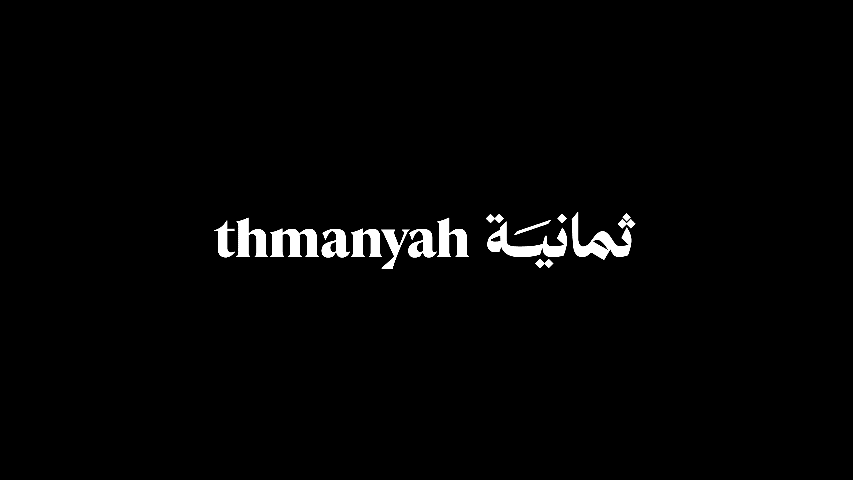

# Analyzing preliminary data from podcast listening records, understanding user behavior, and providing initial recommendations based on that.

**Here is the tasks we want to achieve**


*   Task #1 **(Reading and processing data)**

               1.1.  read the data from the three provided files.
               1.2.  Data Cleaning.
               1.3.  Joining the data together.


*   Task #2 **(Analysis Data)**

  Answer the following questions:

              2.1 What are the most listened-to episode categories?
              2.2 What is the difference in average listening duration between males and females?
              2.3 What is the average number of episodes listened to per user?
              2.4 Looking at the available data, what additional analysis or indicator do you think would be useful to understand user behavior? And why?
            
*   Task #3 **(Generate Recommendations)**

            3.1 Write a simple Python function that recommends episodes to a specific user.





### Import necessary libraries

In [ ]:
!pip install gdown #for downloading files from the drive

In [ ]:
import gdown #used for downloading files from the drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px #used for creating plots (similar to plt and sns)
from sklearn.neighbors import NearestNeighbors
import random

### Download and extract assignment files


In [ ]:
folder_id = '1eWR7ds513NCE9egSdMQq31Ks5XVYkUzc?usp=sharing' #folder contains the provided files
gdown.download_folder(id=folder_id, quiet=False, use_cookies=False)

Retrieving folder contents


Processing file 1VAhLA4r-fciYP8kKTYJbDw7bkfeNI2j6 episodes.csv
Processing file 1ZdZ48iWOXXlwqgMzQhyhGHCuxmJ4SoeL listens.json
Processing file 1foVshmhqNQeh4BDfNwhPFEHlGHBP-aFh users.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1VAhLA4r-fciYP8kKTYJbDw7bkfeNI2j6
To: /content/assignment/episodes.csv
100%|██████████| 652/652 [00:00<00:00, 1.83MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZdZ48iWOXXlwqgMzQhyhGHCuxmJ4SoeL
To: /content/assignment/listens.json
100%|██████████| 7.71k/7.71k [00:00<00:00, 16.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1foVshmhqNQeh4BDfNwhPFEHlGHBP-aFh
To: /content/assignment/users.csv
100%|██████████| 420/420 [00:00<00:00, 752kB/s]
Download completed


['/content/assignment/episodes.csv',
 '/content/assignment/listens.json',
 '/content/assignment/users.csv']

## Task #1 (Reading and processing data)

###  1.1.  read the data from the three provided files.

In [ ]:
df_users = pd.read_csv('assignment/users.csv')
df_users.head()

,user_id,age,gender,country
0,1,38,female,Morocco
1,2,30,female,Jordan
2,3,42,male,Saudi Arabia
3,4,57,female,Egypt
4,5,51,female,Jordan


In [ ]:
df_episodes = pd.read_csv('assignment/episodes.csv')
df_episodes.head()

,episode_id,title,category
0,1,Episode 1,Religion
1,2,Episode 2,Technology
2,3,Episode 3,Society
3,4,Episode 4,News
4,5,Episode 5,Politics


In [ ]:
df_listens = pd.read_json('assignment/listens.json')
df_listens.head()

,user_id,episode_id,duration_seconds
0,16,30,60
1,6,8,120
2,6,13,60
3,6,27,1500
4,17,9,1500




---



## 1.2.  data Cleaning


data-cleaning.avif

### Cleaning User dataframe

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  20 non-null     int64 
 1   age      20 non-null     int64 
 2   gender   20 non-null     object
 3   country  20 non-null     object
dtypes: int64(2), object(2)
memory usage: 772.0+ bytes


In [ ]:
df_users.isnull().sum() #checking the number of null values

,0
user_id,0
age,0
gender,0
country,0


In [ ]:
df_users.duplicated().sum() #checking the number of duplicated values

np.int64(0)

**Good it's already cleaned**

### Cleaning episodes dataframe

In [ ]:
df_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   episode_id  30 non-null     int64 
 1   title       30 non-null     object
 2   category    30 non-null     object
dtypes: int64(1), object(2)
memory usage: 852.0+ bytes


In [ ]:
df_episodes.isnull().sum()

,0
episode_id,0
title,0
category,0


In [ ]:
df_episodes.duplicated().sum()

np.int64(0)

**Good it's already cleaned**

### Cleaning Listens dataframe

In [ ]:
df_listens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   user_id           100 non-null    int64
 1   episode_id        100 non-null    int64
 2   duration_seconds  100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [ ]:
df_listens.isnull().sum()

,0
user_id,0
episode_id,0
duration_seconds,0


In [ ]:
df_listens.duplicated().sum()

np.int64(0)

### **All Dataframes are already cleaned**



---



### 1.3 Joining the data together

In [ ]:
df = pd.merge(df_listens, df_episodes, on='episode_id') #compining df_users , df_episodes using the shared column= episode_id
df = pd.merge(df, df_users, on='user_id') #compining df , df_users using the shared column= user_id
df.head()
# Note that we could merge them using pandasql library also

,user_id,episode_id,duration_seconds,title,category,age,gender,country
0,16,30,60,Episode 30,Sports,24,female,Saudi Arabia
1,6,8,120,Episode 8,Sports,59,male,Morocco
2,6,13,60,Episode 13,Society,59,male,Morocco
3,6,27,1500,Episode 27,News,59,male,Morocco
4,17,9,1500,Episode 9,Sports,21,male,Saudi Arabia


**Now we have merged the data**



---



---



## Task #2 (Analysis Data)

**In This Phase we should answer the following questions:**

*  2.1  Which categories of podcasts are the most listened to? (ما أكثر فئات الحلقات استماعًا؟)
*  2.2 What is the difference in the average listening time between males and females? (ما الفرق في متوسط مدة الاستماع بين الذكور والإناث؟)

* 2.3 What is the average number of episodes listened to by one user?  ( ما متوسط عدد الحلقات التي يستمع لها المستخدم الواحد؟)

* 2.4 Considering the available data, what type of additional analysis or metric do you think would be useful for understanding user behavior? And why? (بالنظر إلى البيانات المتوفرة، ما هو نوع التحليل أو المؤشر الإضافي الذي تعتقد أنه سيكون مفيدًا لفهم سلوك المستخدم؟ ولماذا؟)



### Statistical Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           100 non-null    int64 
 1   episode_id        100 non-null    int64 
 2   duration_seconds  100 non-null    int64 
 3   title             100 non-null    object
 4   category          100 non-null    object
 5   age               100 non-null    int64 
 6   gender            100 non-null    object
 7   country           100 non-null    object
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [ ]:
df.describe()

,user_id,episode_id,duration_seconds,age
count,100.000000,100.00000,100.000000,100.000000
mean,10.760000,15.50000,669.000000,39.760000
std,5.976587,9.64784,689.420046,11.849323
min,1.000000,1.00000,0.000000,19.000000
25%,6.000000,7.00000,60.000000,30.000000
50%,11.000000,14.00000,300.000000,42.000000
75%,16.000000,25.00000,1500.000000,51.000000
max,20.000000,30.00000,1800.000000,59.000000


In [ ]:
df.describe(include="object").T #to get the details about the object (string) columns in the DataFrame

,count,unique,top,freq
title,100,30,Episode 6,7
category,100,6,Society,32
gender,100,2,female,53
country,100,5,Jordan,29


In [ ]:
df["category"].unique() #check the unique categories

array(['Sports', 'Society', 'News', 'Religion', 'Technology', 'Politics'],
      dtype=object)

### visualization Summary

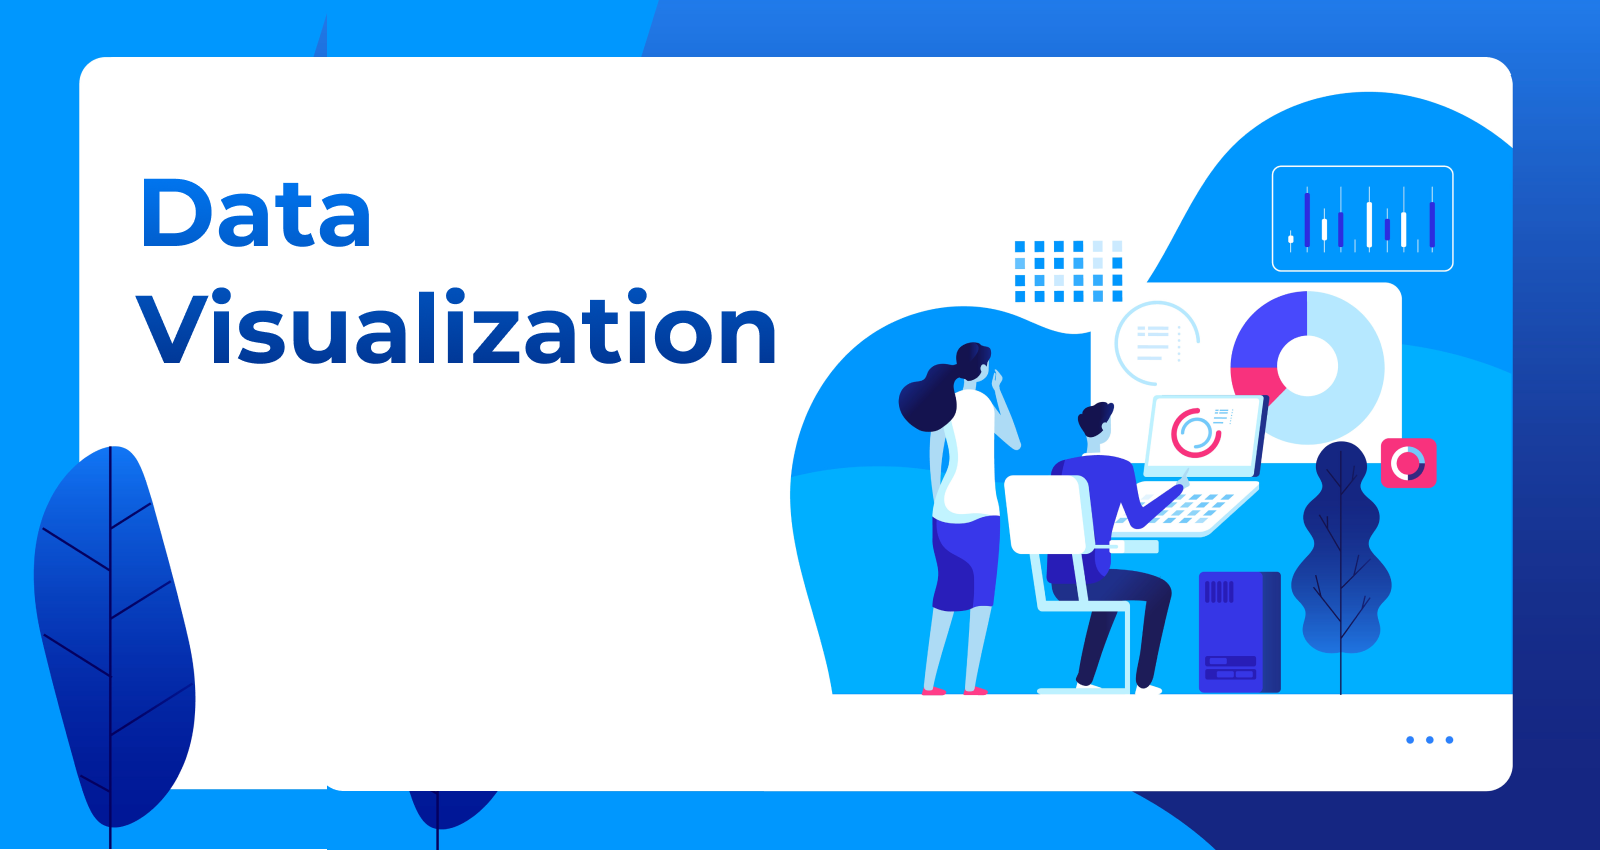



---



### 2.1  Which categories of podcasts are the most listened to? (ما أكثر فئات الحلقات استماعًا؟)

<ipython-input-125-deadc5408d95>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




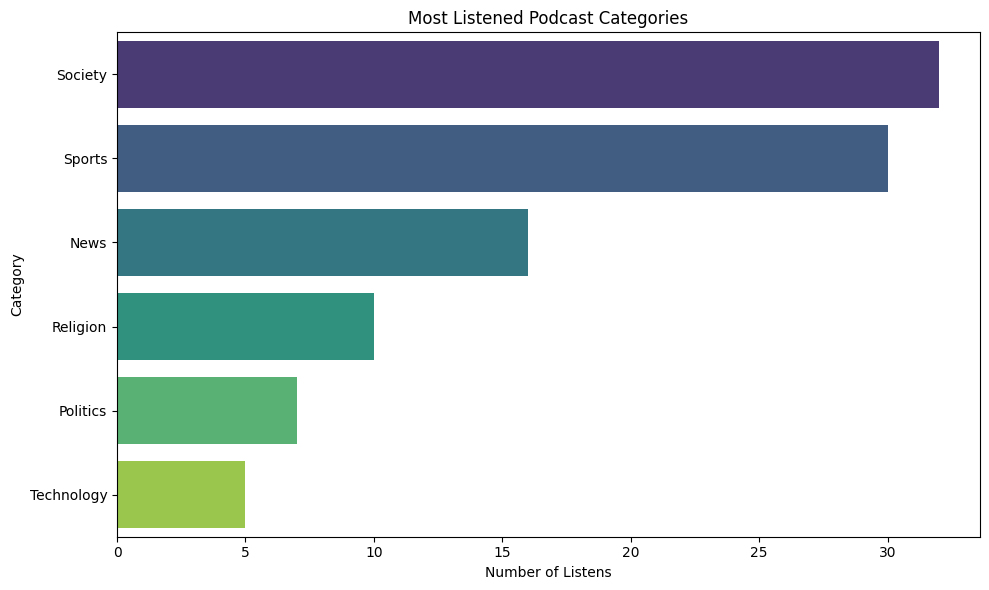

In [ ]:
plt.figure(figsize=(10, 6)) #Set plot dimensions for optimal visualization
category_num = df["category"].value_counts() #to calculate category frequency counts
sns.barplot(x=category_num.values, y=category_num.index, palette="viridis")
plt.title("Most Listened Podcast Categories")
plt.xlabel("Number of Listens")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

**The Plot shows that Sociaty have the highest number of listeners**

however to make sure, i wrote the code below




In [ ]:
category_num.head(6)

,count
category,
Society,32
Sports,30
News,16
Religion,10
Politics,7
Technology,5


### The category with the highest number of listeners are: **Society** with a total of **32** listeners



---



## 2.2 What is the difference in the average listening time between males and females? (ما الفرق في متوسط مدة الاستماع بين الذكور والإناث؟)

In [ ]:
px.pie(df,names="gender",title="Gender Distribution",hole=0.5,color_discrete_sequence=px.colors.sequential.RdBu)
## Plotly Express library support Easy customize for the visualiziton of the database.

Females have a higher disturbution than Males

<ipython-input-128-16592640a3b2>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




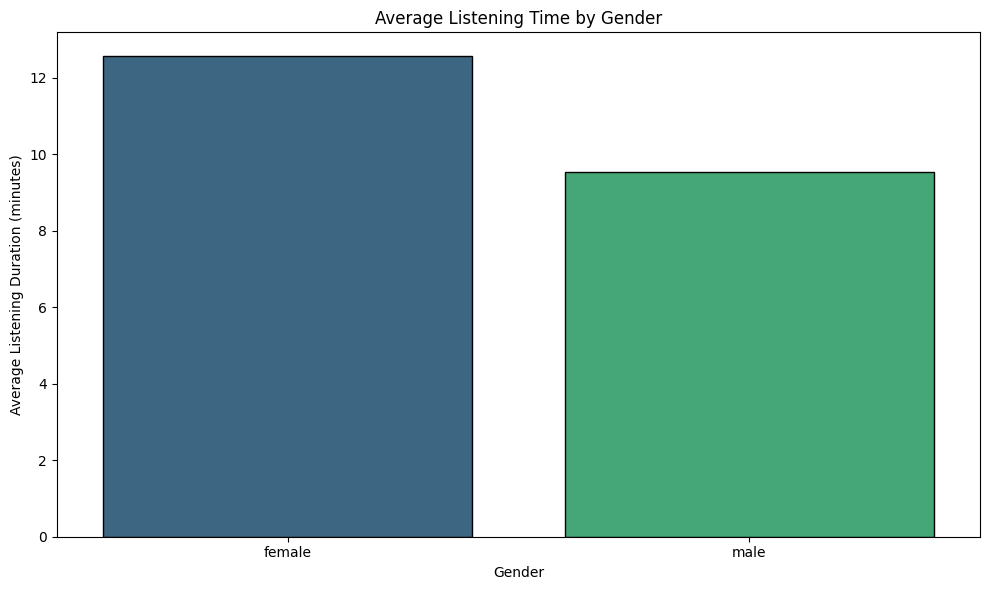

In [ ]:
# Group by gender and calculate average listening time
avg_listen_time = df.groupby("gender")["duration_seconds"].mean()
avg_listen_time = avg_listen_time.reset_index()
avg_listen_time["duration_minutes"] = avg_listen_time["duration_seconds"] / 60 #convert seconds into minutes
# Plot
plt.figure(figsize=(10, 6)) #Initialize figure with optimal dimensions
sns.barplot(data=avg_listen_time, x="gender", y="duration_minutes", palette="viridis", edgecolor="black")
plt.title("Average Listening Time by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Listening Duration (minutes)")
plt.tight_layout()
plt.show()

**The Plot shows that females have a higher average listing duration that males**

However to get the exact difference i wrote the code below

In [ ]:
male_avg = avg_listen_time.loc[avg_listen_time['gender'] == 'male', 'duration_minutes'].values[0]
female_avg = avg_listen_time.loc[avg_listen_time['gender'] == 'female', 'duration_minutes'].values[0]

diff = abs(male_avg - female_avg) #using absolute value to insure the difference appear in positive
print(f"difference between the average listing duration between males and females: {diff:.2f} minutes")

difference between the average listing duration between males and females: 3.01 minutes


### the difference in the average listening time between males and females: 3.01 minutes
( females listening time > males listening time )



---



### 2.3 What is the average number of episodes listened to by one user?  ( ما متوسط عدد الحلقات التي يستمع لها المستخدم الواحد؟)

In [ ]:
episodes_avg = df.groupby('user_id')['episode_id'].count().mean() #we included the repeated listens to the same episode
print(f"the average number of episodes listened to by one user: {episodes_avg:.2f}")

the average number of episodes listened to by one user: 5.26


### The Average number of episodes listened be single user: **5.26**
Note: we included the repeated listens to the same episode

In [ ]:
episodes_avg = df.groupby('user_id')['episode_id'].nunique().mean() #we excluded the repeated listens to the same episode
print(f"the average number of episodes listened to by one user: {episodes_avg:.2f}")

the average number of episodes listened to by one user: 5.00


### The Average number of episodes listened be single user: **5.00**
Note: we excluded the repeated listens to the same episode



---



## 2.4 Considering the available data, what type of additional analysis or metric do you think would be useful for understanding user behavior? And why? (بالنظر إلى البيانات المتوفرة، ما هو نوع التحليل أو المؤشر الإضافي الذي تعتقد أنه سيكون مفيدًا لفهم سلوك المستخدم؟ ولماذا؟)

### I recommend using a heatmap to show how many listeners tune in minute by minute during each episode. This makes it easy to spot which parts kept people most engaged. We can then use these insights to create short toboost episode(aka podcast) promotion.



***here is an example below of how the heatmap will look like***

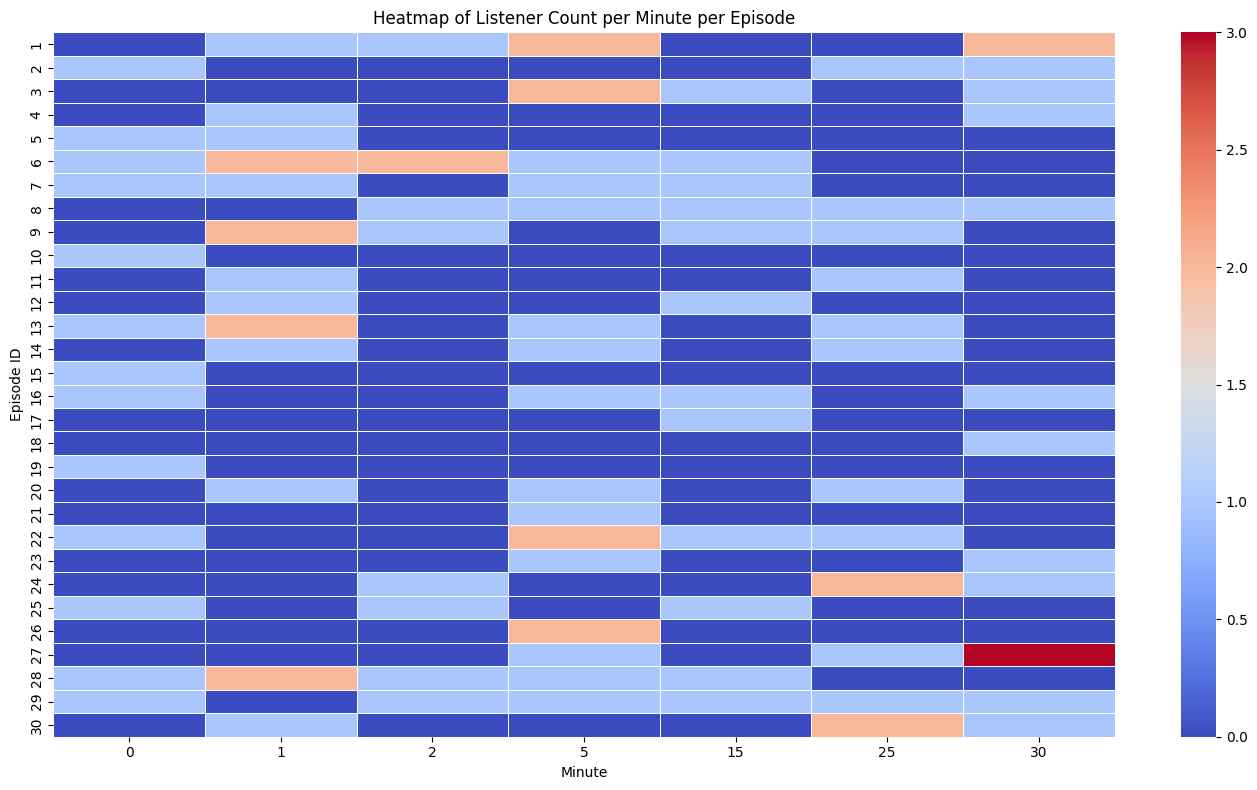

In [ ]:
df['minute'] = (df['duration_seconds'] // 60).astype(int)

heatmap_data = df.pivot_table(
    index='episode_id',
    columns='minute',
    values='user_id',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Listener Count per Minute per Episode")
plt.xlabel("Minute")
plt.ylabel("Episode ID")
plt.tight_layout()
plt.show()



---



---



## Task #3 (Generate Recommendations)

   ### 3.1 Write a simple Python function that recommends episodes to a specific user.


   **Will be using KNN AI MODEL**


In [ ]:
def recommend_episodes(user_id: int, listens_df, episodes_df):
    user_data = listens_df.merge(episodes_df[['episode_id', 'category']], on='episode_id') # Merge to get category per listen
    user_category = pd.crosstab(user_data['user_id'], user_data['category'])   # Create user-category matrix

    if user_id not in user_category.index: #check if user not saved within the database (it's his first time watching a podcast)
        return random.Random().sample(episodes_df['episode_id'].tolist(), 3) #we recommened random episodes for him (in future we may recommened podcasts with the highest rating)

    # Fit KNN model
    model = NearestNeighbors(n_neighbors=3, metric='cosine')
    model.fit(user_category) #adding the user_id + user_categories to the KNN model

    # Find similar users
    user_vector = user_category.loc[[user_id]]
    distances, indices = model.kneighbors(user_vector) #    - distances: Array of distances to similar users (smaller = more similar)
  #    - indices: Array of positions for similar users in the dataset

    similar_users = user_category.iloc[indices[0]].index.tolist()

    # Get recommendations from similar users (excluding episodes already listened)
    recommendations = listens_df[listens_df['user_id'].isin(similar_users)]
    listened = listens_df[listens_df['user_id'] == user_id]['episode_id'].unique()
    mask = recommendations['episode_id'].isin(listened) #checking if the podcast already listened to
    recommendations = recommendations[mask == False] #the episodes already listened to has been remove.

    return recommendations['episode_id'].value_counts().head(3).index.tolist() #only the first 3


In [ ]:
df['user_id'].unique()

array([16,  6, 17, 14, 10, 15, 12,  3, 19,  1,  5,  2, 18, 20,  7, 11,  4,
        8,  9])

### Test Cases

In [ ]:
recommendations = recommend_episodes(user_id=1, listens_df=df_listens, episodes_df=df_episodes)
print("Top 3 recommended episodes for user 1:", recommendations)
recommendations = recommend_episodes(user_id=6, listens_df=df_listens, episodes_df=df_episodes)
print("Top 3 recommended episodes for user 6:", recommendations)
recommendations = recommend_episodes(user_id=10032, listens_df=df_listens, episodes_df=df_episodes)
print("Top 3 recommended episodes for user 10032:", recommendations)  #Recommendations are randomized since this user isn't in our database

Top 3 recommended episodes for user 1: [6, 20, 11]
Top 3 recommended episodes for user 6: [15, 30, 22]
Top 3 recommended episodes for user 10032: [13, 3, 6]


**If you have any question you can contact me by scanning the qr code below**


---



---


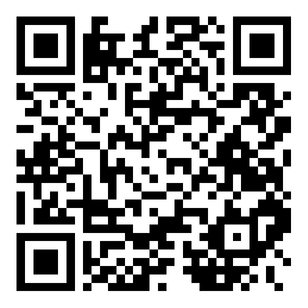

---

---